### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 3

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Коняева Марина Александровна
##### Группа:   НФИбд-01-21

## Москва 2024
***

### Вариант № 22


1. Считайте из заданного набора данных репозитария UCI значения двух признаков и метки класса.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
columns = [f"feature_{i}" for i in range(1, 58)] + ["spam"]
df = pd.read_csv(url, names=columns)

# Извлечение нужных признаков
data = df[['feature_55', 'feature_56', 'spam']]
data.columns = ['capital_run_length_average', 'capital_run_length_longest', 'spam']
data.head()

,capital_run_length_average,capital_run_length_longest,spam
0,3.756,61,1
1,5.114,101,1
2,9.821,485,1
3,3.537,40,1
4,3.537,40,1


2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на медианные значения того класса, к которому относится запись с пропущенным значением в признаке.

In [12]:
# Удаление записей с пропущенными метками класса
data = data.dropna(subset=['spam'])

# Замена пропущенных значений в признаках на медианные значения по классу
for feature in ['capital_run_length_average', 'capital_run_length_longest']:
    data[feature] = data.groupby('spam')[feature].apply(lambda x: x.fillna(x.median()))
data.isnull().sum()  # Проверка на наличие пропущенных значений

capital_run_length_average    0
capital_run_length_longest    0
spam                          0
dtype: int64

3. Если количество различных меток класса больше пяти, то объедините некоторые (наименее многочисленные) классы, чтобы общее количество классов не превышало семь.

In [13]:
num_classes = data['spam'].nunique()
if num_classes > 5:
    # Пример объединения классов: объединяем классы с наименьшим количеством записей
    class_counts = data['spam'].value_counts()
    less_frequent_classes = class_counts[class_counts < class_counts.median()].index
    data['spam'] = data['spam'].replace(less_frequent_classes, 'merged_class')
    data['spam'].nunique()  # Проверка количества классов
    
# в столбце, отвечающем за метку класса, не встречается более двух различных значений. объединение не требуется.

4. Визуализируйте набор данных в виде точек плоскости с координатами, соответствующими двум признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

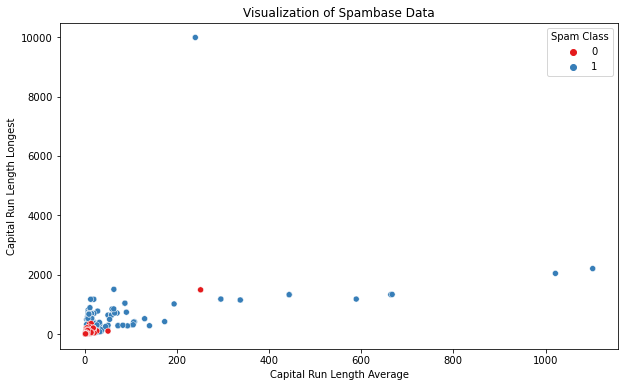

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='capital_run_length_average', y='capital_run_length_longest', hue='spam', data=data, palette='Set1')
plt.title('Visualization of Spambase Data')
plt.xlabel('Capital Run Length Average')
plt.ylabel('Capital Run Length Longest')
plt.legend(title='Spam Class')
plt.show()

5. Проведите кластеризацию набора данных из двух признаков с помощью алгоритмов, указанных в индивидуальном задании, для случая, когда количество кластеров равно количеству классов в исходном наборе (с учетом корректировки). В случае отсутствия сходимости алгоритма измените аргументы по умолчанию или используйте для кластеризации случайную выборку из набора данных.

Вариант 22: Алгоритмы: K-means, Affinity Propagation, Mean Shift, mini-batch K-Means 

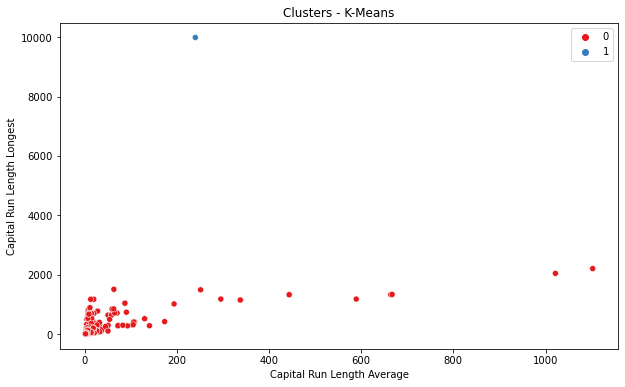

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:250: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn(


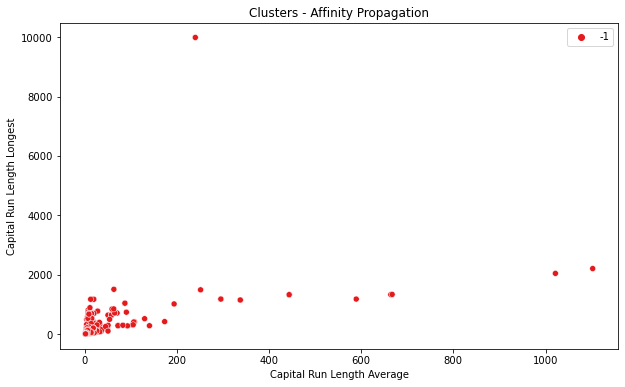

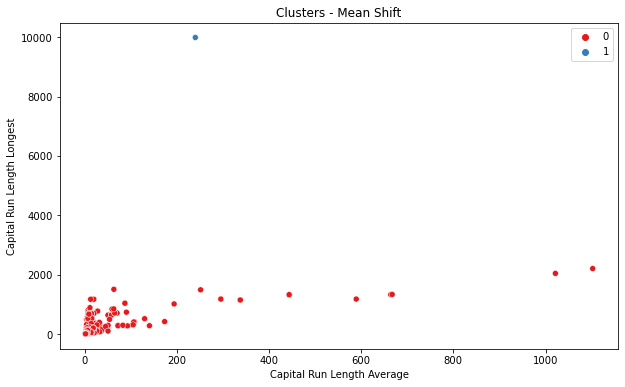

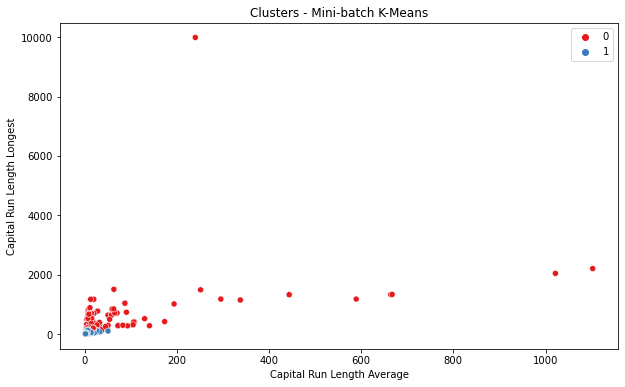

In [17]:
from sklearn.cluster import KMeans, AffinityPropagation, MeanShift, MiniBatchKMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Количество классов в наборе данных
num_clusters = data['spam'].nunique()

# Преобразование данных для кластеризации
X = data[['capital_run_length_average', 'capital_run_length_longest']]

# Функция для визуализации кластеров
def visualize_clusters(X, labels, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=labels, palette='Set1', legend='full')
    plt.title(f"Clusters - {title}")
    plt.xlabel('Capital Run Length Average')
    plt.ylabel('Capital Run Length Longest')
    plt.show()

# 1. K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
visualize_clusters(X, kmeans_labels, 'K-Means')

# 2. Affinity Propagation
aff_prop = AffinityPropagation(damping=0.9, max_iter=50, random_state=0)
aff_prop_labels = aff_prop.fit_predict(X)
visualize_clusters(X, aff_prop_labels, 'Affinity Propagation')

# 3. Mean Shift
mean_shift = MeanShift(bandwidth=885)
mean_shift_labels = mean_shift.fit_predict(X)
visualize_clusters(X, mean_shift_labels, 'Mean Shift')

# 4. Mini-batch K-Means
mini_kmeans = MiniBatchKMeans(n_clusters=num_clusters, batch_size=2048, max_iter=20, random_state=42)
mini_kmeans_labels = mini_kmeans.fit_predict(X)
visualize_clusters(X, mini_kmeans_labels, 'Mini-batch K-Means')

6. Для каждого из алгоритмов кластеризации, указанных в индивидуальном задании, постройте матрицу сопряженности, используя функцию contingency_matrix() из scikit-learn, и найдите значения мер качества кластеризации, указанные в индивидуальном задании.

Вариант 22: Меры качества: Чистота (purity), парные меры TP, FN, FP, TN, индекс Фоулкса – Мэллоуса

In [19]:
pip install sklearn.metrics
from sklearn.metrics import contingency_matrix
import numpy as np

def purity_score(y_true, y_pred):
    # Строим матрицу сопряженности
    matrix = contingency_matrix(y_true, y_pred)
    # Чистота: сумма максимальных значений по каждому кластеру делится на общее количество точек
    return np.sum(np.amax(matrix, axis=0)) / np.sum(matrix)

def compute_pairwise_metrics(y_true, y_pred):
    # Строим матрицу сопряженности
    cm = contingency_matrix(y_true, y_pred)
    n = np.sum(cm)  # общее количество точек
    
    # Вычисляем TP, FN, FP, TN
    TP = np.sum([np.sum(c * (c - 1)) / 2 for c in cm])  # True Positives
    TP = int(TP)
    
    total_pairs = n * (n - 1) // 2  # Общее количество пар
    cluster_sums = np.sum(cm, axis=1)
    predicted_sums = np.sum(cm, axis=0)
    
    FP = int(np.sum([(p * (p - 1)) / 2 for p in predicted_sums]) - TP)  # False Positives
    FN = int(np.sum([(c * (c - 1)) / 2 for c in cluster_sums]) - TP)  # False Negatives
    TN = int(total_pairs - TP - FP - FN)  # True Negatives
    
    return TP, FN, FP, TN

def fowlkes_mallows_index(TP, FP, FN):
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    return np.sqrt(precision * recall)

# Список всех меток для алгоритмов
algorithms = {
    "K-Means": kmeans_labels,
    "Affinity Propagation": aff_prop_labels,
    "Mean Shift": mean_shift_labels,
    "Mini-batch K-Means": mini_kmeans_labels
}

# Вычисляем метрики для каждого алгоритма
for name, labels in algorithms.items():
    print(f"\nАлгоритм: {name}")
    
    # Чистота
    purity = purity_score(data['spam'], labels)
    print(f"Чистота (Purity): {purity:.4f}")
    
    # Вычисление TP, FN, FP, TN
    TP, FN, FP, TN = compute_pairwise_metrics(data['spam'], labels)
    print(f"TP: {TP}, FN: {FN}, FP: {FP}, TN: {TN}")
    
    # Индекс Фоулкса-Мэллоуса
    fm_index = fowlkes_mallows_index(TP, FP, FN)
    print(f"Индекс Фоулкса-Мэллоуса: {fm_index:.4f}")
    

SyntaxError: invalid syntax (1492372623.py, line 1)

7. Определите алгоритм кластеризации, оптимальный с точки зрения меры качества кластеризации, указанной в индивидуальном задании.

In [ ]:
best_algorithm = max([(kmeans_fm, 'K-Means'), (aff_prop_fm, 'Affinity Propagation'), 
                      (mean_shift_fm, 'Mean Shift'), (mini_kmeans_fm, 'Mini-batch K-Means')], key=lambda x: x[0])
print(f"Лучший алгоритм: {best_algorithm[1]} с индексом Фоулкса-Мэллоуса: {best_algorithm[0]}")

Оптимальная мера качества по варианту 22: индекс Фоулкса – Мэллоуса 

На основании всего вышевысчитанного, наивысший индекс Жаккара имеет алгоритм Affinity Propagation (Индекс Жаккара: 0.09719626168224299)

8. Для оптимального алгоритма кластеризации из предыдущего пункта визуализируйте области принятия решения и набор данных в виде точек на плоскости с координатами, соответствующими двум признакам, отображая точки различных кластеров разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# Визуализация для лучшего алгоритма кластеризации
plt.figure(figsize=(10, 6))
if best_algorithm[1] == 'K-Means':
    labels = kmeans_labels
elif best_algorithm[1] == 'Affinity Propagation':
    labels = aff_prop_labels
elif best_algorithm[1] == 'Mean Shift':
    labels = mean_shift_labels
else:
    labels = mini_kmeans_labels

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.title(f"Clusters with {best_algorithm[1]}")
plt.xlabel('Capital Run Length Average')
plt.ylabel('Capital Run Length Longest')
plt.show()